# Data Preprocessing

## Load the data

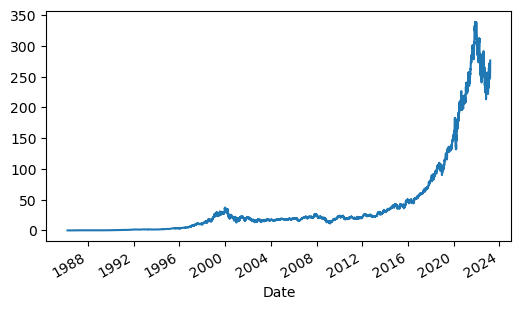

In [85]:
import pandas as pd

df_microsoft = pd.read_excel('data/MICROSOFT_Historical_Daily.xlsx', index_col=0)
df_microsoft.Close.plot();

## Filter the data

![](src/MICROSOFT_LinkedIn.png)

In [86]:
df_microsoft_linkedin = df_microsoft.loc['2016-12-08':].copy()

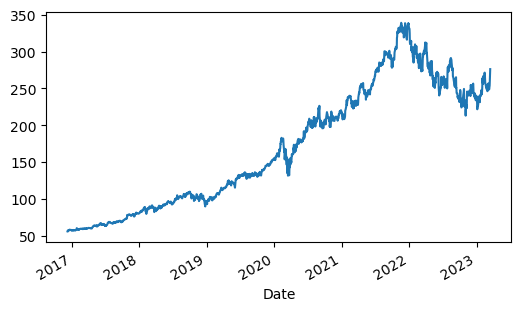

In [87]:
df_microsoft_linkedin.Close.plot();

## Calculate the daily difference

In [88]:
df_microsoft_linkedin['diff_daily_1'] = df_microsoft_linkedin.Close.diff()
df_microsoft_linkedin

,Open,High,Low,Close,Volume,diff_daily_1
Date,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,NaN
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.882095
...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,4.649994
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,10.760010


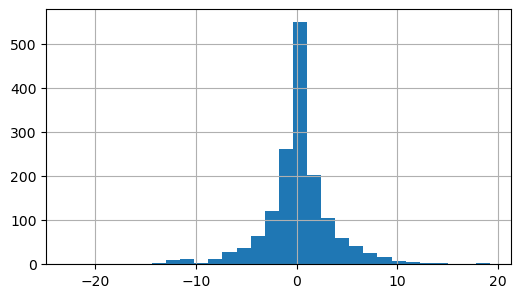

In [89]:
df_microsoft_linkedin.diff_daily_1.hist(bins=30); # it's not necessary

## Did the stock go up or down?

In [90]:
import numpy as np

df_microsoft_linkedin['diff_daily_1_direction'] = np.where(df_microsoft_linkedin.diff_daily_1 > 0, 'UP', 'DOWN')
df_microsoft_linkedin.diff_daily_1_direction.value_counts()

UP      849
DOWN    728
Name: diff_daily_1_direction, dtype: int64

## Calculate Purchase Recommendation

### Buy if it goes up

In [91]:
daily_direction = df_microsoft_linkedin.diff_daily_1_direction

In [92]:
list_buy = []

for direction_tomorrow in daily_direction:
    if direction_tomorrow == 'UP':
        list_buy.append(1)
    else:
        list_buy.append(0)

In [93]:
df_microsoft_linkedin['buy'] = list_buy
df_microsoft_linkedin

,Open,High,Low,Close,Volume,diff_daily_1,diff_daily_1_direction,buy
Date,,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,NaN,DOWN,0
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.882095,UP,1
...,...,...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,4.649994,UP,1
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,10.760010,UP,1


### Buy if it goes and sell if down

> You can only sell if you have already bought

In [94]:
list_buy = []

already_bought = False

for direction_tomorrow in daily_direction:
    if direction_tomorrow == 'UP' and already_bought == False:
        list_buy.append(1)
        already_bought = True
    elif direction_tomorrow == 'DOWN' and already_bought == True:
        list_buy.append(1)
        already_bought = False
    else:
        list_buy.append(0)

In [95]:
df_microsoft_linkedin['buy_sell'] = list_buy

In [96]:
df_microsoft_linkedin

,Open,High,Low,Close,Volume,diff_daily_1,diff_daily_1_direction,buy,buy_sell
Date,,,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,NaN,DOWN,0,0
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.882095,UP,1,1
...,...,...,...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,4.649994,UP,1,0
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,10.760010,UP,1,0


In [97]:
df_microsoft_linkedin = df_microsoft_linkedin.dropna()
df_microsoft_linkedin

,Open,High,Low,Close,Volume,diff_daily_1,diff_daily_1_direction,buy,buy_sell
Date,,,,,,,,,
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.882095,UP,1,1
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,0.183765,UP,1,0
...,...,...,...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,4.649994,UP,1,0
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,10.760010,UP,1,0


## Save the processed DataFrame into an Excel

In [98]:
df_microsoft_linkedin.to_excel('data/Stock_Microsfot_x_Linkedin_Processed.xlsx')